# Linear Regression

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

You are going to work with the following dataset:

In [6]:
heart = pd.DataFrame({'sugar':[75,100,132,114,99,153],'heart_rate':[62,69,79,71,53,84]})
heart

,sugar,heart_rate
0,75,62
1,100,69
2,132,79
3,114,71
4,99,53
5,153,84


## Making it by "hand"

First, let's build step by step a simple linear regression. 
The line fitted to the set of points with the estimation of $\beta_1$ and $\beta_0$  by the least squares method is called the least squares line and has the equation:
$$ \hat{y_{i}} =  \beta_1 \cdot  x_{i} + \beta_0 $$
Where $\beta_1$ is estimated by the formula:

$$
\hat{\beta_1} = \frac{\sum \left( x_{i} - \bar{x} \right) \left( y_{i} - \bar{y} \right)}{\sum \left( x_{i} - \bar{x} \right)^{2}}
$$

And the intercept $\beta_0$ is estimated by:

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}
$$

Note that this is a **simple linear regression**, as we have only one explanatory variable.


### 1. Try to calculate the regression equation associated to the dataset step by step and predict the value for a sugar level of 89
- <b>1.1.</b> Calculate the mean of the values in your X and assign it to the object ``mean_sugar``. In the same way, calculate the mean of your target and assign it to the object ``mean_heart_rate``

In [46]:
mean_sugar = heart.sugar.mean()
mean_heart_rate = heart.heart_rate.mean()


print(f"Mu_sugar : {mean_sugar} | Mu_heartrate : {mean_heart_rate}")


Mu_sugar : 112.16666666666667 | Mu_heartrate : 69.66666666666667


- <b>1.2.</b> Create a new column in your dataset 'heart' named as ``xi-x_mean`` that will contain $( x_{i}-\bar{x})$, with x being the `sugar` variable

In [25]:
heart['xi-x_mean'] = heart['sugar'] - mean_sugar

In [26]:
print(mean_sugar)
heart

112.16666666666667


,sugar,heart_rate,xi-x_mean,yi-y_mean,square(xi-x_mean),(xi-x_mean)(yi-y_mean)
0,75,62,-37.166667,-7.666667,1381.361111,284.944444
4,99,53,-13.166667,-16.666667,173.361111,219.444444
1,100,69,-12.166667,-0.666667,148.027778,8.111111
3,114,71,1.833333,1.333333,3.361111,2.444444
2,132,79,19.833333,9.333333,393.361111,185.111111
5,153,84,40.833333,14.333333,1667.361111,585.277778


- <b>1.3.</b> Create a new column in your dataset 'heart' named as ``yi-y_mean`` that will contain $( y_{i}-\bar{y})$, with y being the `heart_rate` variable

In [27]:
heart['yi-y_mean'] = heart['heart_rate'] - mean_heart_rate

In [28]:
heart

,sugar,heart_rate,xi-x_mean,yi-y_mean,square(xi-x_mean),(xi-x_mean)(yi-y_mean)
0,75,62,-37.166667,-7.666667,1381.361111,284.944444
4,99,53,-13.166667,-16.666667,173.361111,219.444444
1,100,69,-12.166667,-0.666667,148.027778,8.111111
3,114,71,1.833333,1.333333,3.361111,2.444444
2,132,79,19.833333,9.333333,393.361111,185.111111
5,153,84,40.833333,14.333333,1667.361111,585.277778


- <b>1.4.</b> Create a new column in your dataset 'heart' named as ``square(xi-x_mean)`` that will be equal to $(x_{i}-\bar{x})^{2}$

In [29]:
heart['square(xi-x_mean)'] = heart['xi-x_mean']*heart['xi-x_mean']
heart

,sugar,heart_rate,xi-x_mean,yi-y_mean,square(xi-x_mean),(xi-x_mean)(yi-y_mean)
0,75,62,-37.166667,-7.666667,1381.361111,284.944444
4,99,53,-13.166667,-16.666667,173.361111,219.444444
1,100,69,-12.166667,-0.666667,148.027778,8.111111
3,114,71,1.833333,1.333333,3.361111,2.444444
2,132,79,19.833333,9.333333,393.361111,185.111111
5,153,84,40.833333,14.333333,1667.361111,585.277778


- <b>1.5.</b> Create a new column in your dataset 'heart' named as ``(xi-x_mean)(yi-y_mean)`` that will be equal to $( x_{i}-\bar{x})( y_{i}-\bar{y})$

In [30]:
heart['(xi-x_mean)(yi-y_mean)'] = heart['xi-x_mean']*heart['yi-y_mean']
heart

,sugar,heart_rate,xi-x_mean,yi-y_mean,square(xi-x_mean),(xi-x_mean)(yi-y_mean)
0,75,62,-37.166667,-7.666667,1381.361111,284.944444
4,99,53,-13.166667,-16.666667,173.361111,219.444444
1,100,69,-12.166667,-0.666667,148.027778,8.111111
3,114,71,1.833333,1.333333,3.361111,2.444444
2,132,79,19.833333,9.333333,393.361111,185.111111
5,153,84,40.833333,14.333333,1667.361111,585.277778


- <b>1.6.</b> Calculate the coefficient of 'sugar' by using the formula below and assign it to the object ``beta1`` <br> <br>
$$\beta _{1} = \frac{\sum \left ( x_{i}-\bar{x})( y_{i}-\bar{y}\right )}{\sum ( x_{i}-\bar{x})^{2}}$$

In [31]:
beta1 = (heart['(xi-x_mean)(yi-y_mean)'].sum())/(heart['square(xi-x_mean)'].sum())
beta1

0.34122383965311276

- <b>1.7.</b> Calculate the intercept and name it as ``beta0`` by using the formula <br><br>

$$\beta _{0} = \bar{y} - \beta _{1}\bar{x} $$

- <b>1.8.</b> Predict the heart_rate of a person with a sugar level of $89$

In [47]:
heart_rate_predict = beta0 + beta1 * 89 # Replace 89 with desired value

In [48]:
heart_rate_predict

61.76164771470289

### Plot your regression!

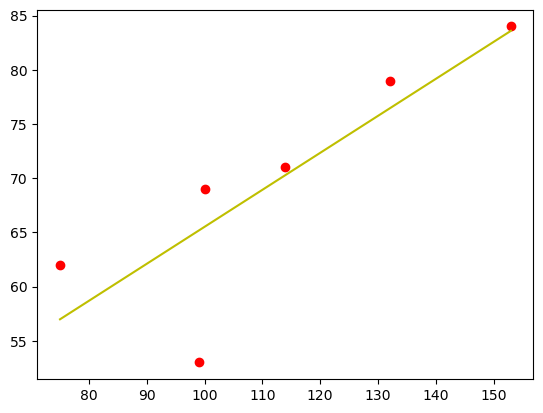

In [53]:
heart = heart.sort_values(by='sugar')

X = heart['sugar']
y = heart['heart_rate']
predictions = []

for value in X:
    predictions.append(beta0 + beta1*value)

fig = plt.figure()
plt.plot(X, y, 'r.', markersize=12)
plt.plot(X, predictions, 'y-')
plt.show()

In [57]:
r2_score(y,predictions) # basically the variance.... without dividing by n
# if closer to 1, it explains the variability better

0.6946985880160519

# Now, for the Linear Regression model

## 1. Import the remaining needed libraries

- numpy as np
- LinearRegression from sklearn.linear_model
- train_test_split from sklearn.model_selection
- r2_score from sklearn.metrics

In [58]:

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## 2. Import the dataset

Since we are dealing with linear regression, we are going to work with a dataset where the target is continuous. <br>
<b>1. Import the dataset `insurance.csv` using pandas, and assign it to an object named `data`</b>

In [61]:
data = pd.read_csv('datasets/insurance.csv')
data.head()


,age,bmi,children,female,northeast,northwest,southeast,smoker,charges
0,19,27.900,0,1,0,0,0,1,16.884924
1,18,33.770,1,0,0,0,1,0,1.725552
2,28,33.000,3,0,0,0,1,0,4.449462
3,33,22.705,0,0,0,1,0,0,21.984471
4,32,28.880,0,0,0,1,0,0,3.866855


Variables:<br>

`INPUT VARIABLES`: numerical<br>
`OUPUT VARIABLE`: numeric (regression) <br>

__GOAL__: Predict median value of health bill charges

`age` : age <br>
`bmi` : body mass index value <br>
`children`: number of children<br>
`female` : whether the individual is a female or not <br>
`northeast`: whether the individual lives in the northeast of the US or not <br>
`northwest`: whether the individual lives in the northwest of the US or not <br>
`southeast`: whether the individual lives in the southeast of the US or not <br>
`smoker`: whether the individual is a smoker or not <br>
<b>`charges`: Individual medical costs billed by health insurance (in thousands of dollars)</b> <br>

**Rmk.** `northeast`, `northwest`, `southeast` are dummy variables for a `region` variable


## 3. Explore the dataset

The next step is to explore our data: while this is not the focus for this class, we are just going to check if we don't have missing values and what is the type of data that we have.

<b>3. Call the method `info()` to check for any missing values and non-numeric data types</b>

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   bmi        1338 non-null   float64
 2   children   1338 non-null   int64  
 3   female     1338 non-null   int64  
 4   northeast  1338 non-null   int64  
 5   northwest  1338 non-null   int64  
 6   southeast  1338 non-null   int64  
 7   smoker     1338 non-null   int64  
 8   charges    1338 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 94.2 KB



By calling the __info()__ method, we can verify that we don't have missing values and all data is numerical, so there is no need to deal with missing data or create dummies. <br>
We are ready to apply linear regression in our dataset! But first, and since we want to evaluate the performance of our model, we need to split our dataset into training and validation. Since we only have 1338 observations, we are not going to create a test dataset.

## 4. Data partition

<b>1. By calling the method `train_test_split()`, split your dataset into train (70%) and validation (30%). Don't forget that you need to define first what are your independent variables and your target/dependent variable.</b> <br>

- Define as `X` the independent variables and `y` the dependent variable (last column - 'charges')
- Divide the `X` into `X_train` and `X_val`, the `y` into `y_train` and `y_val`, and define the following arguments: `test_size = 0.3`, `random_state = 15` 

In [74]:
X = data.drop(columns=['charges'])
y = data['charges']

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=15)


## 5. Basic linear regression

### 5.1. The regression

<b>1. Create an instance of LinearRegression named as `lr_basic` with the default parameters.</b>

In [78]:
lr_basic = LinearRegression()

In [77]:
LinearRegression?


sklearn documentation: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression()</a>



<b>2. Fit your model to your data, and define `X = X_train` and `y = y_train`</b>

In [85]:
lr_basic.fit(X = X_train, y = y_train)


LinearRegression()


sklearn documentation: <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html'>sklearn.linear_model.LinearRegression().predict(X)</a>




<b>3. Predict the values for `X_val` by applying the method `predict()` to your model, with `X_val` as the one parameter, saving the predictions in a variable named `pred`,and check your result</b>

In [81]:
pred = lr_basic.predict(X_val)

In [82]:
pred

array([ 3.36600797e+01,  2.52052429e+01,  3.76025407e+00,  3.27340896e+00,
        2.90949432e+00,  7.92138567e+00,  1.05134142e+00,  3.48537898e+01,
        8.51628430e+00,  8.68191909e+00,  3.90697886e+00,  5.98724755e+00,
        3.60012668e+01,  3.25761339e+01,  5.49752119e+00,  3.73386850e+01,
        2.71429857e+01,  9.37204154e+00,  2.98294809e+01,  8.29514983e+00,
        5.50124456e+00,  9.55776255e+00,  3.48329512e+00,  1.84015986e+01,
        1.18969066e+01,  8.62624823e+00,  7.57501178e+00,  3.87164835e+01,
        3.68236087e+00, -9.12240103e-02,  6.73885570e+00,  9.04645045e+00,
        5.58730003e+00,  4.07587832e+01,  7.17941908e+00,  5.57074703e+00,
        5.60990839e+00,  3.90563691e+00,  6.33878202e+00,  1.13923435e+01,
        7.15032678e+00,  1.06302936e+01,  1.56911249e+01,  2.88543280e+00,
        1.09708253e+01,  1.11895487e+01,  1.16802019e+01,  6.40182911e+00,
        9.54595386e+00,  2.83622238e+01,  1.47050138e+00,  2.21622063e+00,
        9.13646725e+00,  

Those are the predicted values to your validation dataset by applying the model created previously based on train data.

### 5.2. The attributes
Before assessing, we can see the values $\underline{\beta}=(\beta_1, \ldots, \beta_n)$.

<b>Regression coefficients: </b>``.coef_``




<b>4. To check the coefficients calculated by applying the linear regression, call the attribute `coef_` associated to your model</b>

In [86]:
lr_basic.coef_

array([ 2.61094980e-01,  3.33516375e-01,  5.35688129e-01,  2.14144396e-02,
        9.71511354e-01,  7.16700030e-01, -1.33947397e-01,  2.37547867e+01])

The result is an array that shows all the coefficients. In order to better understand what is the variable associated to each coefficient, let's convert the result to a DataFrame and define as headers the variables.

<b>5. Create a dataframe that will contain the values of the coefficients

In [87]:
df = pd.DataFrame(lr_basic.coef_)

In [88]:
df

,0
0,0.261095
1,0.333516
2,0.535688
3,0.021414
4,0.971511
5,0.716700
6,-0.133947
7,23.754787


<b>6. By using the method `set_index()`, define the index of Dataframe equal to the name of the features (you can get the feature names with `X_train.columns`)

In [96]:
df = df.set_index(X_train.columns)
df.columns = ['beta_i']


In [92]:
df

,beta_i
age,0.261095
bmi,0.333516
children,0.535688
female,0.021414
northeast,0.971511
northwest,0.716700
southeast,-0.133947
smoker,23.754787


<b>The independent term: </b>``.intercept_``




<b>7. To obtain the intercept of the linear regression, call the attribute `intercept_` associated to your model

In [93]:
# The intercept (often labeled the constant) is the expected mean value of Y when all X=0.
lr_basic.intercept_

-12.97027625365762

### 5.3. Model Analysis - Dispersion Measures

$$
SS_{\text{Total}} = SS_{\text{Regression}} + SS_{\text{Error}}
$$

$$
\sum_{i=1}^{n}({Y_i} - \bar{Y})^2 = \sum_{i=1}^{n}(\hat{Y_i} - \bar{Y})^2 + \sum_{i=1}^{n}({Y_i} - \hat{Y_i})^2
$$


The closer $SS_R$ is to $SS_{Total}$, or equivalently, the smaller $SS_E$ is, the better the regression line will be at explaining the dispersion of the observed pairs around it.


### 5.4. Test the Significance of the model


In a simple linear regression we are testing:

$H_0: \beta_1 = 0$ (model is not significant) **vs**  $H_1: \beta_1 \neq 0$ (model is significant)
- If $\beta_1=0$, then I am not using the data at all.

In a multiple linear regression we are testing:

$H_0: \beta_1 = \beta_2 = \beta_3 = \dots =  0$  **vs**  $\exists n: \beta_n \neq 0$

For this purpose, we will conduct an F hypothesis test. It is common to summarize all the information related to the partitioning of squares and the significance test of the model in a table called Analysis of Variance - ANOVA.

| Source          | Sum of Squares (SS)    | Degrees of Freedom (df)     | Mean Square (MS)       | F-statistic       | p-value  |
|:-----------------:|:------------------------:|:-----------------------------:|:------------------------:|:-------------------:|:----------|
| Regression      | $SS_{\text{R}} = \sum_{i=1}^{n}(\hat{Y_i}-\bar{Y})^2 $        | 1                           | $MS_{\text{R}} = \frac{SS_R}{1}$      | $F_0 = \frac{MS_R}{MS_E}$               | $p = P(\mathcal{F}_{(1,n-2)} > F_0)$      |
| Residual (Error)| $SS_{\text{E}} = \sum_{i=1}^{n}(\hat{Y_i}- {Y_i})^2 $        | n-2                         | $MS_{\text{E}} = \frac{SS_E}{n-2}$      |                   |          |
| Total           | $SS_{\text{Total}} = \sum_{i=1}^{n}({Y_i}- \bar{Y})^2$    | n-1                         |                        |                   |          |


**Even if a linear model is significant, its 'quality' may be poor in the sense that SSR may fail to explain most of the SST, or equivalently, SSE is very high compared to SSR**. I want to see if the model is still *"good"*

The library sklearn don't have any option that allows to calculate automatically the standard error associated to each coefficient, the t-value and the p-value. <br>

One alternative is to use the library statsmodels. It's not possible to associate it to our resuts from sklearn, but it is possible to create a new regression.

**1. Run the cell below to get a full statistical analysis of an OLS (Ordinary Least Squares) regression made with out data**

In [97]:
import statsmodels.api as sm
from scipy import stats



X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:18:43   Log-Likelihood:                -4305.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1329   BIC:                             8675.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.0299      1.033    -12.614      0.0

The summary statistic table calls many of the stats outputs the statistics in an pretty format, containing all the needed values to interpret our model: The residuals distribution, the coefficients and the t-value and the p-value for each of them, and also the evaluation of the model using the metrics R-Squared, Adjusted R-Squared and F-statistic. That evaluation, however, is based on the performance of the model in the training dataset. <br>

__The p-value__ <br>
For each estimated regression coefficient, the p-value provides an estimate of the probability that the true coefficient is zero given the value of the estimate. Small p-values suggest that the true coefficient is very unlikely to be zero, which means that the feature is extremely likely to have relationship with the dependent variable. <br> In this way, we can also check the p-value to understand the feature importance and select the most "important" variables to build our final model.




In [38]:
est2.pvalues

const        1.543153e-34
age          7.783217e-89
bmi          6.498194e-31
children     5.769682e-04
female       6.933475e-01
northeast    4.476493e-02
northwest    2.035333e-01
southeast    8.734595e-01
smoker       0.000000e+00
dtype: float64

Now, let's try changing the model's parameters. In a linear regression there's not much to change, so let's just try a regression without the independent term (the intercept):

## 6. Tweaking a linear regression

### 6.1. The regression

<b>1. Create an instance of LinearRegression named as `lr_noicept`, with `fit_intercept = False`.</b>

In [39]:
lr_noicept = #CODE HERE

<b>2. Fit your model to your data, and define `X = X_train` and `y = y_train`</b>

In [40]:
lr_noicept.fit(X=X_train,y=y_train)

LinearRegression(fit_intercept=False)

<b>3. Predict the values for `X_val` by applying the method `predict()` to your model and check your result</b>

In [41]:
pred_noicept = lr_noicept.predict(X_val)
pred_noicept

array([31.63438787, 27.59547866,  5.55458103,  5.61833787,  4.34960075,
        8.33089545,  5.78345124, 32.47084405,  9.02701208,  9.02157694,
        3.93492169,  7.34920259, 32.23577135, 28.643867  ,  7.01068925,
       35.26280765, 31.90256839,  8.59899133, 29.36202891,  9.26617773,
        6.64705526, 11.78530435,  5.57379545, 13.63167498, 10.67616968,
        8.64272017,  8.70387105, 37.03302264,  5.96623416,  4.43616649,
        9.46031587,  7.41787521,  7.58200027, 38.09793358,  7.07515334,
        4.68613545,  6.11497066,  4.40964054,  6.16085939,  9.59481872,
        8.78338393, 10.19850493, 14.70060446,  4.51664446, 11.27581275,
       11.74015163, 11.65966713,  6.62943441,  9.74623614, 31.58107958,
        3.6430343 ,  4.839958  ,  9.16839378,  9.05092183, 11.34327256,
       27.02992415,  6.11925634, 12.45713937,  4.22716553, 11.76906751,
       10.64512354, 30.71270664, 28.35181217,  7.011532  , 33.87906652,
       34.62278997,  6.82623318, 10.35346434, 13.31966498, 33.55

### 6.2. The attributes

<b>4. To check the coefficients calculated by applying the linear regression, call the attribute `coef_` associated to your model</b>

In [42]:
lr_noicept.coef_

array([ 0.20812357,  0.04804661,  0.366154  , -0.78516147, -0.84453348,
       -1.07449291, -0.79665872, 23.06657323])

<b>5. Create a dataframe that will contain the values of the coefficients

In [43]:
pd.DataFrame(lr_noicept.coef_)

,0
0,0.208124
1,0.048047
2,0.366154
3,-0.785161
4,-0.844533
5,-1.074493
6,-0.796659
7,23.066573


<b>6. By using the method `set_index()`, define the index of Dataframe equal to the name of the variables

In [44]:
pd.DataFrame(lr_noicept.coef_,columns=['noicept']).set_index(X_train.columns).join(df)

,noicept,0
age,0.208124,0.261095
bmi,0.048047,0.333516
children,0.366154,0.535688
female,-0.785161,0.021414
northeast,-0.844533,0.971511
northwest,-1.074493,0.716700
southeast,-0.796659,-0.133947
smoker,23.066573,23.754787


Finally, time to compare the models:

## 7. Evaluation

A measure of model quality is the coefficient of __determination__, $R^{2}$

$R^{2}$ indicates the proportion of variability in the dependent variable that is explained by the independent variable.

$$R^{2} = \frac{SS_R}{SS_{Total}} = 1 - \frac{SS_E}{SS_{Total}} =   1-\frac{\sum_{i=1}^{n}{(y_{i}-\hat{y_{i}})^{2}}}{\sum_{i=1}^{n}{(y_{i}-\bar{y})^{2}}}$$

<b>1. Use the `r2_score` function with `y_val` and your base model's predictions as parameters to get the $R^2$ score for the base model</b>

In [45]:
r2_score(y_val,pred)

0.7866474582742321

<b>2. Use the `r2_score` function with `y_val` and your no intercept model's predictions as parameters to get the $R^2$ score for the no intercept model</b>

In [46]:
r2_score(y_val,pred_noicept)

0.7575999540598752